#  EMOTION CLASSIFICATION AND SENTIMENT ANALYSIS
##  TRADITIONAL MACHINE LEARNING
#### Using CLASSIFIERS (Naive bayes, Logistic regression, Random forest)
###### __author__ = "Shakir Sadiq"

####  Import all the required modules and packages.

In [1]:
import pandas
import numpy
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import pickle

#### Import datasets and create dataframes.
*  Using pandas

In [2]:
dataframe_test = pandas.read_csv(r"C:\Users\shaki\Desktop\ecsa\datasets\data_test.csv")
dataframe_train = pandas.read_csv(r"C:\Users\shaki\Desktop\ecsa\datasets\data_train.csv")

####  Split dataframes into training and testing.
*  Using pandas

In [3]:
#Text column from csv file
text_test = dataframe_test.Text
text_train = dataframe_train.Text

#emotion column from csv file
emotion_test = dataframe_test.Emotion
emotion_train = dataframe_train.Emotion

#concatenate dataframes of both the datasets
data = pandas.concat([dataframe_train, dataframe_test])
print("size of training set:",(len(dataframe_train['Text'])))
print("size of testing set:",(len(dataframe_test['Text'])))
print(data.Emotion.value_counts()) #size of each individual emotion

size of training set: 7934
size of testing set: 3393
joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


####  Data Cleaning.
*  Cleaning datasets and getting them down to a form with which we can work.
*  Using regex.
*  nltk for tokenization.

In [4]:
htmltags = r"(<.*?>)"
urls = r"^https?:\/\/.*[\r\n]*"
punctuation = r"(\\W|\\d)"
hashtags = r"(#[\d\w\.]+)"

def cleaning_tokenization(data):
    '''function for data cleaning and tokenization'''
    data = re.sub(htmltags, " ", str(data)) #remove html tags
    data = re.sub(urls, " ", str(data)) #remove urls
    data = re.sub(punctuation, " ", str(data)) #remove punctuation
    data = re.sub(hashtags, " ", str(data)) #remove hashtags
    data = data.strip() #remove whitespaces

    data = nltk.word_tokenize(str(data)) #tokenization using nltk
    
    return data

#### Vectorization.
*  Using scikit-learn.

In [5]:
vector = TfidfVectorizer(tokenizer=cleaning_tokenization, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

vector.fit_transform(data.Text)

text_train_vector = vector.transform(text_train)
text_test_vector = vector.transform(text_test)

#### Confusion Matrix for data visualization.
*  Using scikit-learn

In [6]:
def plot_confusion_matrix(true_values, predicted_values, classes, normalize=False, title=None, cmap=plt.cm.Purples):
    '''This function prints and plots the confusion matrix'''
    if not title:
        if normalize:
            title = "Normalized confusion matrix"
        else:
            title = "Confusion matrix without normalization"
    
    #Compute confusion matrix
    cm = confusion_matrix(true_values, predicted_values)
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, numpy.newaxis]
    fig, ax = plt.subplots()
    
    #size of the confusion matrix
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation="nearest", cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)

    #labels around the matrix
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel="True label",
           xlabel="Predicted label")
    
    #alignment of labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    #create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [7]:
emotion_categories = ['joy', 'fear', 'anger', 'sadness', 'neutral']

#  Naive Bayes Classifier.

Accuracy: 69.55496610669024 %
F1 Score: 69.55496610669024


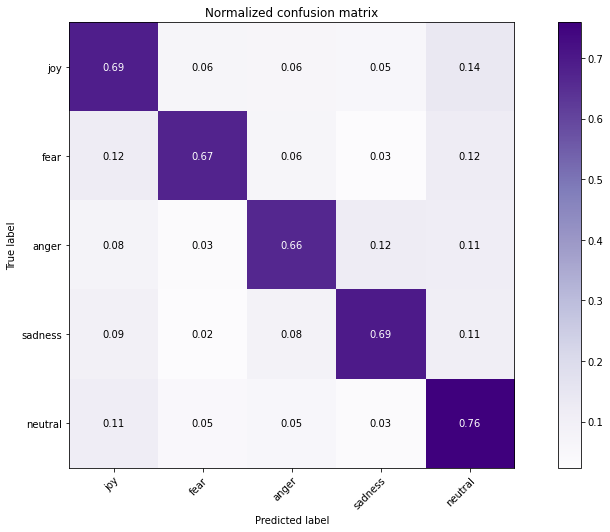

In [8]:
naive_bayes = MultinomialNB(alpha=0.7, fit_prior=False, class_prior=None)
naive_bayes.fit(text_train_vector, emotion_train)
naive_bayes_prediction = naive_bayes.predict(text_test_vector)

#Accuracy is used when the True Positives and True negatives are more important.
#F1-score is used when the False Negatives and False Positives are crucial.
print("Accuracy:", (accuracy_score(emotion_test, naive_bayes_prediction) * 100),"%")
print("F1 Score:", (f1_score(emotion_test, naive_bayes_prediction, average='micro') * 100))

#Plot confusion matrix
plot_confusion_matrix(emotion_test, naive_bayes_prediction, classes=emotion_categories, normalize=True)
plt.show()

#   Logistic Regression.

Accuracy: 69.61391099322134 %
F1 Score: 69.61391099322134


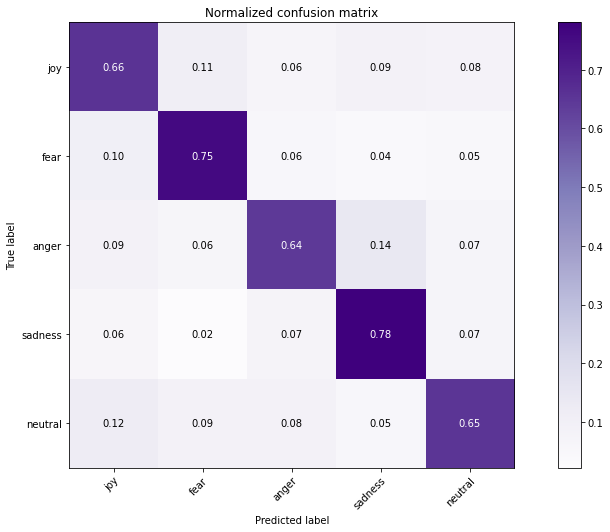

In [9]:
#solver is a string that decides what solver to use for fitting the model.
#multi_class is a string that decides the approach to use for handling multiple classes.
#max_iter is an integer that defines the maximum number of iterations by the solver during model fitting.

logistic = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
logistic.fit(text_train_vector, emotion_train)
logistic_prediction = logistic.predict(text_test_vector)

print("Accuracy:", (accuracy_score(emotion_test, logistic_prediction) * 100),"%")
print("F1 Score:", (f1_score(emotion_test, logistic_prediction, average='micro') * 100))

#Plot confusion matrix
plot_confusion_matrix(emotion_test, logistic_prediction, classes=emotion_categories, normalize=True)
plt.show()

#  Random Forest Classifier

Accuracy: 67.40347774830533 %
F1 Score: 67.40347774830533


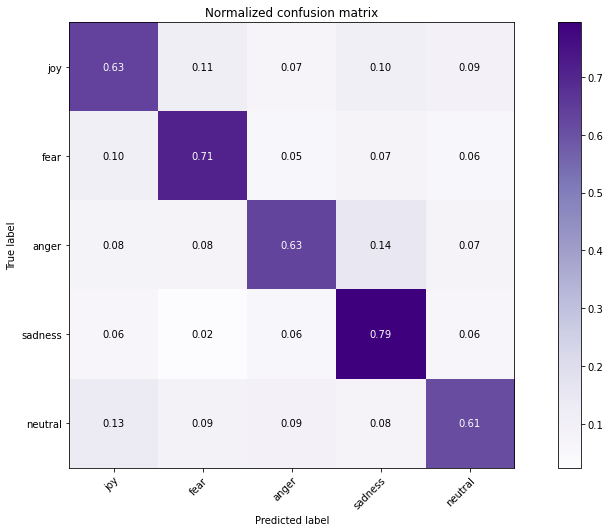

In [10]:
'''n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions.
Higher number of trees give you better performance but makes your code slower.'''

random_forest = RandomForestClassifier(n_estimators = 1000)
random_forest.fit(text_train_vector, emotion_train)
random_forest_prediction = random_forest.predict(text_test_vector)

print("Accuracy:", (accuracy_score(emotion_test, random_forest_prediction) * 100),"%")
print("F1 Score:", (f1_score(emotion_test, random_forest_prediction, average='micro') * 100))

#Plot confusion matrix
plot_confusion_matrix(emotion_test, random_forest_prediction, classes=emotion_categories, normalize=True)
plt.show()

## Save the model.

In [21]:
rf_model = Pipeline([('tfidf', vector), ('clf', random_forest),])
filename = r"C:\Users\shaki\Desktop\ecsa\models\rfc.sav"
pickle.dump(rf_model, open(filename, 'wb'))

## Load the model.

In [26]:
model = pickle.load(open(filename, 'rb'))

message = "I am happy!"
model.predict([message])

array(['joy'], dtype=object)